# Decision Tree Projects
 

In [96]:
#Import necessary Libraries
import numpy as np
import pandas as pd


#For data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Feature - Undergrad , Marital.Status , City.Population , Work.Experience , Urban




Label - Taxable.Income




Use Decision Trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"




Data Description :




Undergrad : person is under graduated or not




Marital.Status : marital status of a person





Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government




Work Experience : Work experience of an individual person




Urban : Whether that person belongs to urban area or not





In [97]:
data=pd.read_csv('https://raw.githubusercontent.com/pravinknr/DataScience_R_Codes/master/2.%20Implemetation%20of%20the%20Algorithms%20on%20Datasets/Supervised%20Machine%20Learning%20Techniques/Random%20Forest/Fraud%20Check/Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [98]:
#lets do Data Summary
data.shape

(600, 6)

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [100]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [101]:
print(data.apply(lambda col:col.unique()))

Undergrad                                                  [NO, YES]
Marital.Status                           [Single, Divorced, Married]
Taxable.Income     [68833, 33700, 36925, 50190, 81002, 33329, 833...
City.Population    [50047, 134075, 160205, 193264, 27533, 116382,...
Work.Experience    [10, 18, 30, 15, 28, 0, 8, 3, 12, 4, 19, 6, 14...
Urban                                                      [YES, NO]
dtype: object


In [102]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [103]:
#Lets plot in Heat Map

In [104]:
df=data.corr().abs()

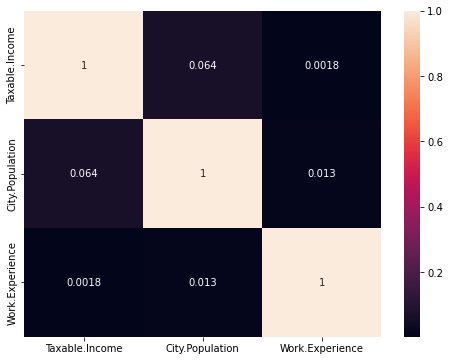

In [105]:
plt.figure(figsize=(8,6))
sns.heatmap(df,annot=True)
plt.show()

Okay , So our label is  in continiour data . we have to convert into categories class data. using 
function. and lamda funcitio.

In [106]:
def filterx(x):
    if x<=30000:
        return 'Risky'
    elif x>30000:
        return 'Good'
data['Taxable_Income']=data['Taxable.Income'].apply(filterx)

In [107]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [108]:
#Now we are good two delete the Taxable.Income columns .

In [109]:
data.drop('Taxable.Income',axis=1,inplace=True)

In [110]:
data.head(2)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good


In [111]:
#Now we have to change good in zero and risky in 1

In [112]:
data['Taxable_Income']=data['Taxable_Income'].replace({'Good':0,'Risky':1})

In [113]:
data.head(2)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income
0,NO,Single,50047,10,YES,0
1,YES,Divorced,134075,18,YES,0


In [114]:
from sklearn.preprocessing import LabelEncoder

In [115]:
lab_enc=LabelEncoder()

In [116]:
df1=lab_enc.fit_transform(data[['Undergrad']])
pd.Series(df1)
data['Undergrad']=df1

In [117]:
df1=lab_enc.fit_transform(data[['Urban']])
pd.Series(df1)
data['Urban']=df1

In [125]:
data.head(2)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Income,Divorced,Married,Single
0,0,Single,50047,10,1,0,0,0,1
1,1,Divorced,134075,18,1,0,1,0,0


In [123]:
df1=pd.get_dummies(data['Marital.Status'])
df1.head(2)

,Divorced,Married,Single
0,0,0,1
1,1,0,0


In [124]:
data[['Divorced','Married','Single']]=df1

In [126]:
data.drop(columns=['Marital.Status'],inplace=True)

# Feature and Required

In [127]:
x=data.drop(columns=['Taxable_Income'])
y=data.Taxable_Income

# Standard Scaler Not Need

# Train Test Split

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=942555)

In [144]:
def metrics_score(cnn,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=cnn.predict(x_train)
        print("=================Training Score================")
        print("Accuracy Score == >",accuracy_score(y_train,y_pred)*100)
    
    elif train==False:
        pred=cnn.predict(x_test)
        print("=================Testing Score=================")
        print("Accuracy Score==",accuracy_score(y_test,pred)*100)
        print("Classification Report==> ",classification_report(y_test,pred))

# Model Building

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [132]:
cnn=DecisionTreeClassifier()

In [133]:
cnn.fit(x_train,y_train)

DecisionTreeClassifier()

# Lets see Decision Tree How it looks

In [135]:
from sklearn import tree

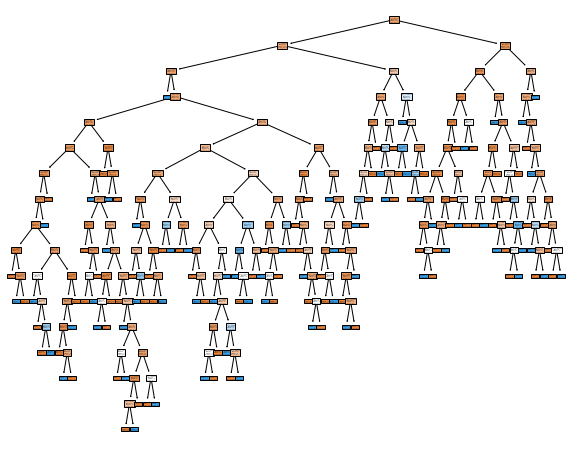

In [137]:
plt.figure(figsize=(10,8))
tree.plot_tree(cnn,filled=True)
plt.show()

# Looks good Lets check accuracy of our model

In [145]:
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

=================Training Score================
Accuracy Score == > 100.0
=================Testing Score=================
Accuracy Score== 68.0
Classification Report==>                precision    recall  f1-score   support

           0       0.81      0.78      0.80       120
           1       0.24      0.27      0.25        30

    accuracy                           0.68       150
   macro avg       0.52      0.53      0.52       150
weighted avg       0.70      0.68      0.69       150



# Our Model is Overfitted We have to tune some parameter.

In [147]:
from sklearn.model_selection import GridSearchCV

In [148]:
best_param={'criterion':['entropy','gini'],
           'min_samples_leaf':range(2,10),
           'min_samples_split':range(2,4),
           'max_depth':range(2,10),
           'max_leaf_nodes':range(2,6)}

In [149]:
grid_search=GridSearchCV(estimator=cnn,param_grid=best_param,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)
grid_search.best_params_


{'criterion': 'entropy',
 'max_depth': 2,
 'max_leaf_nodes': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [151]:
cnn=DecisionTreeClassifier(criterion='entropy',max_depth=2,max_leaf_nodes=2,min_samples_leaf=2,min_samples_split=2)

In [152]:
cnn.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_leaf_nodes=2,
                       min_samples_leaf=2)

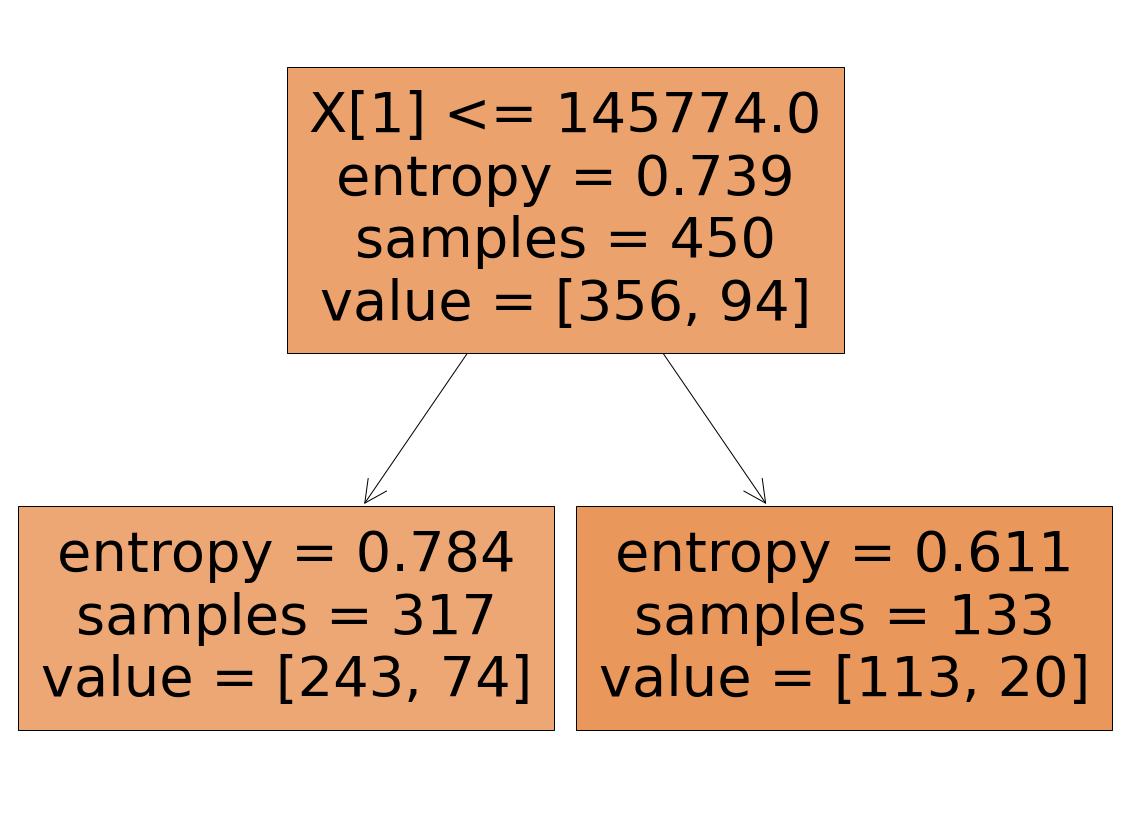

In [156]:
plt.figure(figsize=(20,15))
tree.plot_tree(cnn,filled=True)
plt.show()

In [157]:
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

=================Training Score================
Accuracy Score == > 79.11111111111111
=================Testing Score=================
Accuracy Score== 80.0
Classification Report==>                precision    recall  f1-score   support

           0       0.80      1.00      0.89       120
           1       0.00      0.00      0.00        30

    accuracy                           0.80       150
   macro avg       0.40      0.50      0.44       150
weighted avg       0.64      0.80      0.71       150



In [ ]:
#Student of DataScience
#Student of DataTrained- Saurav
#Date - 16:09:2022
#Time - 15:25